Clustering Kmeans

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv("/content/drive/MyDrive/1000_Companies.csv")
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        1000 non-null   float64
 1   Administration   1000 non-null   float64
 2   Marketing Spend  1000 non-null   float64
 3   State            1000 non-null   object 
 4   Profit           1000 non-null   float64
dtypes: float64(4), object(1)
memory usage: 39.2+ KB


In [ ]:
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,81668.927200,122963.897612,226205.058419,119546.164656
std,46537.567891,12613.927535,91578.393542,42888.633848
min,0.000000,51283.140000,0.000000,14681.400000
25%,43084.500000,116640.684850,150969.584600,85943.198543
50%,79936.000000,122421.612150,224517.887350,117641.466300
75%,124565.500000,129139.118000,308189.808525,155577.107425
max,165349.200000,321652.140000,471784.100000,476485.430000


In [ ]:
df.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'Profit'], dtype='object')

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit_transform(df)


array([[ 1.79902277e+00,  1.10519698e+00,  2.68296826e+00,
         1.69630142e+00],
       [ 1.73986891e+00,  2.25369218e+00,  2.37831645e+00,
         1.68534269e+00],
       [ 1.54302211e+00, -1.73056845e+00,  1.98540734e+00,
         1.66804111e+00],
       ...,
       [ 4.00017747e-01,  9.43575567e+00,  1.02451111e-02,
         6.86796488e+00],
       [ 1.00586937e+00,  1.57593787e+01,  6.06202226e-01,
         5.00186867e+00],
       [ 1.70942709e+00,  1.17370268e+01,  7.56420302e-01,
         8.32663195e+00]])

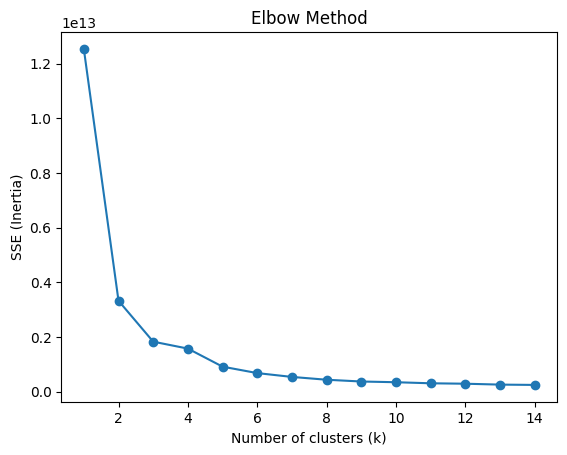

In [ ]:
from sklearn.cluster import KMeans

sse = []
k_range = range(1,15)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(df)
    sse.append(kmeans.inertia_)  # Sum of squared errors

# Plot elbow graph
plt.plot(k_range, sse, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('SSE (Inertia)')
plt.title('Elbow Method')
plt.show()


In [ ]:
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=5,random_state=0)
kmeans.fit(df)

KMeans(n_clusters=5, random_state=0)

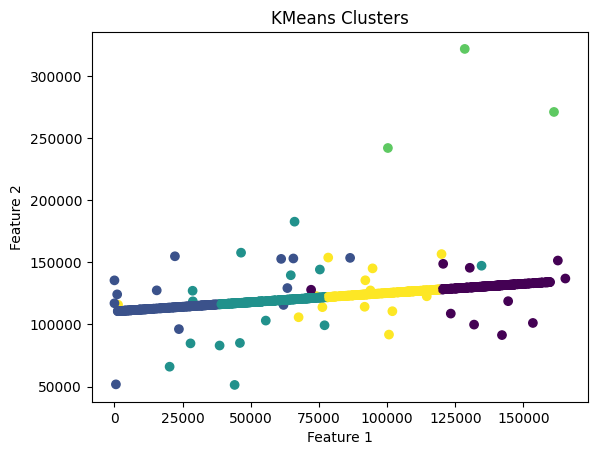

In [ ]:
clusters=kmeans.labels_
df['clusters']=clusters

# After fitting KMeans with best k
plt.scatter(df['R&D Spend'], df['Administration'], c=clusters, cmap='viridis')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('KMeans Clusters')
plt.show()
